In [1]:
%matplotlib inline
import pandas as pd

In [2]:
number = pd.read_excel('number.xlsx')
number.head()

,number,start_bid,close_price
0,912666666,20000,0.0
1,921222222,20000,20000.0
2,927444444,20000,20000.0
3,927666666,20000,0.0
4,926666666,120000,0.0


In [3]:
sold = number[number.close_price >= number.start_bid]
sold

,number,start_bid,close_price
1,921222222,20000,20000.0
2,927444444,20000,20000.0
5,956666666,120000,120000.0
10,948888888,120000,120000.0
16,928999999,20000,40200.0
17,910888888,20000,26000.0
19,906555555,20000,25600.0
20,907888888,20000,21200.0
25,905999999,20000,32200.0
27,917777777,120000,140000.0


In [4]:
sold['common'] = sold.number % 10
sold.head()

C:\Users\nakhonpathompc\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,number,start_bid,close_price,common
1,921222222,20000,20000.0,2
2,927444444,20000,20000.0,4
5,956666666,120000,120000.0,6
10,948888888,120000,120000.0,8
16,928999999,20000,40200.0,9


In [5]:
commonFreq = sold.groupby(['common', 'start_bid']).size().unstack('start_bid').fillna(0)
commonFreq

start_bid,20000,120000
common,,
0,8.0,1.0
1,4.0,1.0
2,3.0,0.0
3,1.0,0.0
4,2.0,0.0
5,10.0,2.0
6,6.0,1.0
7,2.0,1.0
8,11.0,3.0


In [6]:
dummy = pd.get_dummies(sold['common'])
dummy.head()

,0,1,2,3,4,5,6,7,8,9
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
5,0,0,0,0,0,0,1,0,0,0
10,0,0,0,0,0,0,0,0,1,0
16,0,0,0,0,0,0,0,0,0,1


In [7]:
sold2 = pd.concat([sold, dummy], axis = 1)

In [8]:
sold2.head()

,number,start_bid,close_price,common,0,1,2,3,4,5,6,7,8,9
1,921222222,20000,20000.0,2,0,0,1,0,0,0,0,0,0,0
2,927444444,20000,20000.0,4,0,0,0,0,1,0,0,0,0,0
5,956666666,120000,120000.0,6,0,0,0,0,0,0,1,0,0,0
10,948888888,120000,120000.0,8,0,0,0,0,0,0,0,0,1,0
16,928999999,20000,40200.0,9,0,0,0,0,0,0,0,0,0,1


In [9]:
number['sold'] = 0
number.head()

,number,start_bid,close_price,sold
0,912666666,20000,0.0,0
1,921222222,20000,20000.0,0
2,927444444,20000,20000.0,0
3,927666666,20000,0.0,0
4,926666666,120000,0.0,0


In [10]:
number.loc[number.close_price >= number.start_bid, 'sold'] = 1
number.head()

,number,start_bid,close_price,sold
0,912666666,20000,0.0,0
1,921222222,20000,20000.0,1
2,927444444,20000,20000.0,1
3,927666666,20000,0.0,0
4,926666666,120000,0.0,0


In [11]:
X = number[number.close_price.notnull()]
X.tail()

,number,start_bid,close_price,sold
251,901999999,20000,40800.0,1
252,928777777,20000,0.0,0
253,909111111,20000,20000.0,1
254,907555555,20000,0.0,0
255,921111111,120000,0.0,0


In [12]:
Y = X['close_price']
Y.shape

(256,)

In [13]:
X = X.drop('close_price', 1)
X.head()

,number,start_bid,sold
0,912666666,20000,0
1,921222222,20000,1
2,927444444,20000,1
3,927666666,20000,0
4,926666666,120000,0


In [14]:
X.head()

,number,start_bid,sold
0,912666666,20000,0
1,921222222,20000,1
2,927444444,20000,1
3,927666666,20000,0
4,926666666,120000,0


In [15]:
X['common'] = X.number % 10
X.head()

,number,start_bid,sold,common
0,912666666,20000,0,6
1,921222222,20000,1,2
2,927444444,20000,1,4
3,927666666,20000,0,6
4,926666666,120000,0,6


In [16]:
X = pd.concat([X, pd.get_dummies(X['common'])], axis = 1)
X.head()

,number,start_bid,sold,common,0,1,2,3,4,5,6,7,8,9
0,912666666,20000,0,6,0,0,0,0,0,0,1,0,0,0
1,921222222,20000,1,2,0,0,1,0,0,0,0,0,0,0
2,927444444,20000,1,4,0,0,0,0,1,0,0,0,0,0
3,927666666,20000,0,6,0,0,0,0,0,0,1,0,0,0
4,926666666,120000,0,6,0,0,0,0,0,0,1,0,0,0


In [17]:
import sklearn.ensemble

In [18]:
rf = sklearn.ensemble.RandomForestClassifier()
rf

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
#first predict sold/unsold
Ysold = X['sold']
Xsold = X.drop(['sold', 'number'], axis = 1)
print (Ysold.shape)
print (Xsold.shape)

(256,)
(256, 12)


In [20]:
rf.fit(Xsold, Ysold)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [21]:
Ysoldp = rf.predict(Xsold)
Ysoldp

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0], dtype=int64)

In [22]:
Ysoldp = pd.Series(Ysoldp)
Ysoldp.name = 'psold'
Ysoldp

0      0
1      0
2      0
3      0
4      0
5      0
6      0
7      0
8      0
9      0
10     1
11     0
12     0
13     0
14     0
15     0
16     1
17     0
18     0
19     0
20     0
21     0
22     0
23     0
24     0
25     1
26     0
27     0
28     0
29     0
      ..
226    1
227    0
228    0
229    0
230    0
231    0
232    0
233    0
234    1
235    0
236    0
237    0
238    0
239    0
240    1
241    0
242    1
243    0
244    0
245    0
246    0
247    1
248    0
249    0
250    0
251    1
252    0
253    0
254    0
255    0
Name: psold, Length: 256, dtype: int64

In [23]:
Ysold.head()

0    0
1    1
2    1
3    0
4    0
Name: sold, dtype: int64

In [24]:
pd.concat([Ysold, Ysoldp], axis = 1)

,sold,psold
0,0,0
1,1,0
2,1,0
3,0,0
4,0,0
5,1,0
6,0,0
7,0,0
8,0,0
9,0,0


In [25]:
Xprice = Xsold[Ysoldp == 1]
Xprice.head()

,start_bid,common,0,1,2,3,4,5,6,7,8,9
10,120000,8,0,0,0,0,0,0,0,0,1,0
16,20000,9,0,0,0,0,0,0,0,0,0,1
25,20000,9,0,0,0,0,0,0,0,0,0,1
32,20000,9,0,0,0,0,0,0,0,0,0,1
41,20000,9,0,0,0,0,0,0,0,0,0,1


In [26]:
Yprice = Y[Ysoldp == 1]
Yprice.head()

10    120000.0
16     40200.0
25     32200.0
32     30422.0
41     35800.0
Name: close_price, dtype: float64

In [27]:
import sklearn.neighbors

In [28]:
kNN = sklearn.neighbors.KNeighborsRegressor()
kNN

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [29]:
kNN.fit(Xprice, Yprice)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [30]:
pXprice = kNN.predict(Xprice)
pXprice

array([ 128240. ,   34684.4,   34684.4,   34684.4,   34684.4,  194880. ,
         34684.4,  128240. ,  194880. ,  194880. ,   34684.4,  128240. ,
        194880. ,  194880. ,   34684.4,   34684.4,   34684.4,   34684.4,
         34684.4,   34684.4,  194880. ,   34684.4,   34684.4,   34684.4,
         34684.4,   34684.4,  194880. ,   34684.4,   34684.4,   34684.4,
        128240. ,   34684.4])

In [31]:
pYprice = pd.Series(pXprice)
pYprice.name = 'predict_price'

In [32]:
Yprice.head()

10    120000.0
16     40200.0
25     32200.0
32     30422.0
41     35800.0
Name: close_price, dtype: float64

In [33]:
final = pd.concat([Yprice.reset_index(), pYprice], axis = 1).set_index('index')
final.index.name = None
final.head()

,close_price,predict_price
10,120000.0,128240.0
16,40200.0,34684.4
25,32200.0,34684.4
32,30422.0,34684.4
41,35800.0,34684.4


In [34]:
final.predict_price.head()

10    128240.0
16     34684.4
25     34684.4
32     34684.4
41     34684.4
Name: predict_price, dtype: float64

In [35]:
final.loc[final.predict_price < Xprice.start_bid, 'predict_price'] = 0

In [36]:
final

,close_price,predict_price
10,120000.0,128240.0
16,40200.0,34684.4
25,32200.0,34684.4
32,30422.0,34684.4
41,35800.0,34684.4
52,161200.0,194880.0
60,34800.0,34684.4
63,132800.0,128240.0
82,264400.0,194880.0
84,176400.0,194880.0


In [37]:
Yother = Y[Ysoldp == 0]
Yother.head()

0        0.0
1    20000.0
2    20000.0
3        0.0
4        0.0
Name: close_price, dtype: float64

In [38]:
Yother2 = pd.DataFrame(Yother)
Yother2

,close_price
0,0.0
1,20000.0
2,20000.0
3,0.0
4,0.0
5,120000.0
6,0.0
7,0.0
8,0.0
9,0.0


In [39]:
final = Yother2.append(final).fillna(0).sort_index()

In [40]:
final.head(256)

,close_price,predict_price
0,0.0,0.0
1,20000.0,0.0
2,20000.0,0.0
3,0.0,0.0
4,0.0,0.0
5,120000.0,0.0
6,0.0,0.0
7,0.0,0.0
8,0.0,0.0
9,0.0,0.0


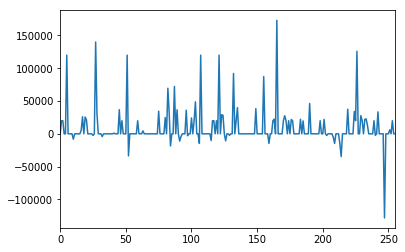

In [41]:
(final.close_price - final.predict_price).plot()

In [42]:
import numpy as np

In [43]:
mseFINAL = np.mean((final.close_price - final.predict_price)**2)
print(mseFINAL)

802879973.6756245


In [44]:
rmseFINAL = np.sqrt(mseFINAL)
print (rmseFINAL)

28335.136733
